# The Battle of the Neighborhoods - Crime and Healthy Food Priority Areas in Baltimore, MD

## Part I: Statement of the Problem, Background, and Data

### Statement of the Problem

#### Baltimore, Maryland is one of the largest cities in the United States. Less than an hour drive from the nation's capital of Washington, D.C., it is an urban area beset by a high rate of violent crime and crime's attendant spillover effects into other aspects of life, including the seemingly unrelated issue of physical health and well-being.  One of consequences of a high crime rate is that it discourages retail development where it is persistent.  While this makes sense on its face as new retail development is likely to attract crime in an already crime-ridden area, where it concerns the food security of people living in high crime areas, the lack of development can have lasting impacts on their access to healthy foods, which, in turn, can lead to more crime also.

#### Baltimore's Department of Planning and the Johns Hopkins Center for a Livable Future aims to balance the need for greater access to food security for those in high crime areas or neighborhoods and the need for business' right to economic security.  By identifying what it terms 'Healthy Food Priority Areas' (hereafter HFPA), it can make recommendations on the best location for supermarket development in the city of Baltimore.  Whereas identification of HFPAs have been dependent on the relationship of the median household income to the federal poverty level, the percentage of households with access to a vehicle, and the distance to a supermarket, crime has been a neglected factor.  This is no doubt due to crime's consideration as a supply-side factor that increases the cost of a supermarket doing business in a specific area.  Crime, though, may also be a demand-side factor.  That is, particularly residents of specific areas or neighborhoods may prefer to travel farther to shop in an area or neighborhood with less crime.  This project will consider supermarket location in Baltimore neighborhoods and its relationship to neighborhood crime rates.

### Background

#### Approximately a quarter of Baltimore, Maryland's 600,000 residents live in an HFPA (formerly referred to as 'food deserts').  A majority minority city, access to healthy food is particularly pronounced for Black residents.  Nearly 125,000 Black Baltimoreans (or about 31% of the Black population) live in HFPAs; this compares to a little more than 16,000 Whites (or about 9% of the White population.  Nearly a third of all children in Baltimore, some 38,000 youngsters, do not have access to healthy foods where they live.  The average Healthy Food Availability Index (HFAI), a measure of the degree to which a market basket of staple foods and healthy options of common foods are available, is in the lowest tier.  Indeed, almost 50 percent of Baltimore neighborhoods are classified as Healthy Food Priority Areas.

#### Though the lack of access to supermarket is assumed to be linearly associated with median income, the literature does not support this conclusion in all cases.  In some places, in the United States and elsewhere, sometimes there is greater access to supermarkets in urban areas and high-need neighborhoods.  It is true that there are many low-class neighborhoods where access to healthy foods is limited.  It is also true that some higher-income neighborhoods where this is the case.  Income, like supermarket access, though, may be influenced by some other factor.

#### Race and vehicle ownership, while they may be associated with limited access to healthy foods, are also factors that may be explained by something else.  Ignoring crime, which has negative relationship with income and vehicle ownership, and which is predominant among racial minorities, means that one cannot truly understand why some neighborhoods have high numbers of supermarket and why others have low number of supermarkets.  Proper identification of HFPAs must consider crime.  Once properly identified, suggestions may be made to the city of Baltimore about where to locate supermarkets to achieve food equity.

### Research Aim

#### This project seeks to highlight areas of the city of Baltimore where its Department of Planning and the Johns Hopkins Center for a Livable Future might advocate for future grocery store and supermarket locations to be built or opened.  Primarily a spatial analysis problem, this project considers existing grocery store and supermarket locations in the context of the city's neighborhood crime rates, but looks at high crime areas as locations that could in future could be host to increased development.

### Data

#### For this project I will utilize two primary data sources: Baltimore Neighborhood Crime Data from https://data.baltimorecity.gov/Crime/Crime-by-Neighborhood/6ayg-3z5z and Baltimore area supermarket data from Foursquare.

#### Crime data come from calendar year 2018 and include reports of nearly 70,000 violent crimes committed in 230 neighborhoods of Baltimore.  Crimes include aggravated assault, arson, auto theft, burglary, common assault, homicide, larceny, larceny from auto, rape, robbery-carjacking, robbery-commercial, robbery-residence, robbery-street, and shooting.  The data are aggregated to the neighborhood level and a crime rate per 1,000 residents is calculated based on population numbers from the 2010 Census.  Latitudes and longitudes exist for all the neighborhoods in this project.

#### To count the number of supermarkets within each Baltimore neighborhood, I use Foursquare to extract venue data for supermarkets only.  I limit the project to supermarkets because they provide the widest variety of healthy foods.  Smaller grocers, convenience stores, and public markets are rated low on the Healthy Food Availability Index (HFAI) and are therefore excluded.  When searching for venues, I will use a search radius of 200m as this is the optimal urban neighborhood size.  The goal is to ascertain, first, whether there are fewer supermarkets in neighborhoods with a high crime rate than in neighborhoods with a low crime rate.  I hypothesize that there are.  Among these neighborhoods, those with moderate crime but low numbers of supermarkets per 1,000 residents, should be targets for supermarket development.  The assumption is that supermarkets may be willing to accept some level of crime to do business as the removal of all crime is too costly.

## Part II: Method, Results, and Conclusion

### Methodology

#### The aim of this project is to conduct a simple spatial analysis of the neighborhoods in the Baltimore metropolitan area.  Specifically, I first want to identify and visualize the location of grocery stores and supermarkets in Baltimore.  Second, I want to visualize those locations in the context of crime in Baltimore neighborhoods.  This second task will be accomplished by overlay store locations on a heat map of crime.

#### This project assumes a positive linear relationship between the rate of crime and the percentage of Black residents in a neighborhood.  It therefore also assumes that said Black residents will be the most adversely affected by the lack of grocery stores or supermarkets in their areas.  These are the people the city wants to help, of course, by addressing and ameliorating that lack.  Given that, I finally identify high crime neighborhoods that have no stores and I highlight these neighborhoods as potential locations of future stores to combat the Healthy Food Priority Food Areas.  Again, I overlay these potential locations on top of the heat map of crime in Baltimore to help readers visualize where potential new stores might be built.

In [1]:
# Import libraries needed for this project.
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np # library to handle data in a vectorized manner

import requests # library to handle requests

#pip install "ipython-beautifulsoup[bs4]"
#from bs4 import BeautifulSoup

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge geopy --yes        # if needed
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 

In [2]:
# Import comma separated file that contains the Baltimore Crime Data by Neighborhood. Latitudes and longitudes are already included.

url='https://raw.githubusercontent.com/DrDDTorres/Coursera_Capstone/master/BaltimoreCrimesXNeighborhoodwDemographics_2018.csv'
balt_crime_df = pd.read_csv(url)
balt_crime_df.head(5)

,ID,District,Neighborhood,NeighborhoodCityState,Latitude,Longitude,ViolentCrimes,CrimesPer1000,Population,White,Blk_AfAm,AmInd_AkNa,Asian,NatHaw_Pac,Other_Race,TwoOrMore,Hisp_Lat,Male,Female,AGE0_4,AGE5_11,AGE12_14,AGE15_17,AGE18_24,AGE25_34,AGE35_44,AGE45_64,AGE65ovr,Families,Married,Married18,MaleHH,MaleHH18,FemaleHH,FemaleHH18,Housing,Occupied,Occ_Own,Occ_Rent,Vacant,Vac_Rent,Vac_Sale,Vac_Other
0,1,NORTHERN,ABELL,ABELL Baltimore MD,39.324474,-76.610944,149,168,889,606,213,3,33,1,4,29,30,424,465,55,43,5,10,118,254,149,186,69,159,105,41,12,4,42,19,515,440,248,192,75,49,4,22
1,2,SOUTHWEST,ALLENDALE,ALLENDALE Baltimore MD,39.291798,-76.675200,470,132,3554,18,3497,8,6,0,5,20,21,1536,2018,179,315,136,181,317,383,315,1039,689,874,253,62,111,34,510,193,1608,1433,818,615,175,99,20,56
2,3,NORTHEAST,ARCADIA,ARCADIA Baltimore MD,39.331811,-76.564717,66,53,1235,623,537,4,12,0,10,49,31,592,643,101,85,40,55,116,188,164,380,106,305,194,79,23,9,88,40,510,462,356,106,48,14,9,25
3,4,NORTHWEST,ARLINGTON,ARLINGTON Baltimore MD,39.348165,-76.683140,306,118,2598,33,2496,3,9,0,10,47,17,1219,1379,148,237,92,114,231,297,305,775,399,585,215,63,76,28,294,130,1312,1079,485,594,233,64,24,145
4,5,NORTHEAST,ARMISTEAD GARDENS,ARMISTEAD GARDENS Baltimore MD,39.304972,-76.553158,252,73,3458,2698,108,51,14,8,413,166,841,1621,1837,266,330,113,125,272,496,438,929,489,877,431,164,115,47,331,160,1543,1459,981,478,84,26,17,41


In [3]:
# What is the shape of the data?

balt_crime_df.shape

(218, 43)

In [4]:
# Define latitude and longitude for Toronto, Ontario, Canada
address = 'Baltimore, MD'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Latitude and longitude of '+address+' are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


Latitude and longitude of Baltimore, MD are 39.2908816, -76.610759.


In [5]:
# Define Foursquare credentials and version
CLIENT_ID = '22K2SDQCPEC2Z1UO0WKXMBL25LQDJ0S5HBUVC0NWAC1FCDWJ' # my Foursquare ID
CLIENT_SECRET = '25R4AY5PXTXUURDUICG4HYZES1QRMQWV5GHXC5X32JONEMFS' # my Foursquare Secret
VERSION = '20190806' # Foursquare API version (today's date)

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 22K2SDQCPEC2Z1UO0WKXMBL25LQDJ0S5HBUVC0NWAC1FCDWJ
CLIENT_SECRET:25R4AY5PXTXUURDUICG4HYZES1QRMQWV5GHXC5X32JONEMFS


In [6]:
# Search Foursquare venue categories for grocery stores.
search_query = 'Grocery Store'
categoryId = '4bf58dd8d48988d118951735'

In [7]:
# Get nearby grocery stores of Baltimore nieghborhoods using a radius of 300 meters.
def getNearbyVenues(names, latitudes, longitudes, radius=300, LIMIT=50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]["venues"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
# Create new dataframe for Baltimore Supermarkets
balt_markets = getNearbyVenues(names=balt_crime_df['Neighborhood'],
                                   latitudes=balt_crime_df['Latitude'],
                                   longitudes=balt_crime_df['Longitude']
                                  )

ABELL
ALLENDALE
ARCADIA
ARLINGTON
ARMISTEAD GARDENS
ASHBURTON
BALTIMORE HIGHLANDS
BARCLAY
BARRE CIRCLE
BAYVIEW
BEECHFIELD
BELAIR-EDISON
BELAIR-PARKSIDE
BELLONA-GITTINGS
BEREA
BETTER WAVERLY
BEVERLY HILLS
BIDDLE STREET
BLYTHEWOOD
BOLTON HILL
BOOTH-BOYD
BRADDISH AVE./PANWAY
BREWERS HILL
BRIDGEVIEW/GREENLAWN
BROADWAY EAST
BROOKLYN
BURLEITH-LEIGHTON
BUTCHERS HILL
CALLAWAY-GARRISON
CAMERON VILLAGE
CARROLL-SOUTH HILTON
CARROLLTON RIDGE
CEDARCROFT
CEDMONT
CEDONIA
CENTRAL FOREST PARK
CENTRAL PARK HEIGHTS
CHARLES NORTH
CHARLES VILLAGE
CHERRY HILL
CHESWOLDE
CHINQUAPIN PARK/BELV
COLDSPRING
COLDSTREAM HOMESTEAD
CONCERNED CITIZENS O
COPPIN HEIGHTS/ASHBU
CROSS COUNTRY
CROSS KEYS
CURTIS BAY
CYLBURN
DARLEY PARK
DICKEYVILLE
DOLFIELD
DORCHESTER/GRAN-BARR
DOWNTOWN
DRUID HEIGHTS
DUNBAR
EAST ARLINGTON
EAST BALTIMORE MIDWA
EASTERWOOD
EASTWOOD
EDMONDSON VILLAGE
EDNOR GARDENS-LAKESI
ELLWOOD PARK/MONUMEN
EVERGREEN
EVERGREEN LAWN
FAIRMOUNT
FALLSTAFF
FEDERAL HILL/MONTGOM
FOREST PARK
FOREST PARK/GOLF COU
FOUR BY 

In [9]:
# Check size of dataframe
print(balt_markets.shape)
balt_markets.head()
balt_markets.groupby(['Venue Latitude', 'Venue Longitude']).ngroups

(75, 7)


59

In [10]:
# Prepare locations for mapping.
balt_markets = balt_markets.drop_duplicates(['Venue Latitude', 'Venue Longitude'])
locations = balt_markets[['Venue Latitude', 'Venue Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[58]

[39.3560037931363, -76.63431874678083]

In [11]:
# Map grocery store and supermarket locations using folium
map = folium.Map(location=[39.3, -76.6], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point],
                       fill='true',
                       radius=5,
                       fill_color='black',
                        color='clear',
                       fill_opacity=1).add_to(map)
map

In [12]:
# Create a new dataframe that yields the count of venues by neighborhood
bmcounts_df = balt_markets.groupby('Neighborhood').agg('count')
bmcounts_df = bmcounts_df.iloc[:, [2]]
bmcounts_df.rename(columns={"Venue": "Number of Supermarkets"}, inplace=True)
bmcounts_df.head()

,Number of Supermarkets
Neighborhood,
ABELL,1
ALLENDALE,1
ARLINGTON,2
BALTIMORE HIGHLANDS,1
BARRE CIRCLE,1


In [13]:
# What is the maximum of the neighborhood counts of supermarkets/grocery stores?

bmcounts_df['Number of Supermarkets'].max()

3

In [14]:
# What is the minimum of the neighborhood counts of supermarkets/grocery stores?

bmcounts_df['Number of Supermarkets'].min()

1

In [15]:
# Merge Baltimore crime data with Baltimore supermarkets/grocery stores data.

geo_merged = pd.merge(balt_crime_df, bmcounts_df, on="Neighborhood", how='outer').fillna(0)
geo_merged.head()

,ID,District,Neighborhood,NeighborhoodCityState,Latitude,Longitude,ViolentCrimes,CrimesPer1000,Population,White,Blk_AfAm,AmInd_AkNa,Asian,NatHaw_Pac,Other_Race,TwoOrMore,Hisp_Lat,Male,Female,AGE0_4,AGE5_11,AGE12_14,AGE15_17,AGE18_24,AGE25_34,AGE35_44,AGE45_64,AGE65ovr,Families,Married,Married18,MaleHH,MaleHH18,FemaleHH,FemaleHH18,Housing,Occupied,Occ_Own,Occ_Rent,Vacant,Vac_Rent,Vac_Sale,Vac_Other,Number of Supermarkets
0,1,NORTHERN,ABELL,ABELL Baltimore MD,39.324474,-76.610944,149,168,889,606,213,3,33,1,4,29,30,424,465,55,43,5,10,118,254,149,186,69,159,105,41,12,4,42,19,515,440,248,192,75,49,4,22,1.0
1,2,SOUTHWEST,ALLENDALE,ALLENDALE Baltimore MD,39.291798,-76.675200,470,132,3554,18,3497,8,6,0,5,20,21,1536,2018,179,315,136,181,317,383,315,1039,689,874,253,62,111,34,510,193,1608,1433,818,615,175,99,20,56,1.0
2,3,NORTHEAST,ARCADIA,ARCADIA Baltimore MD,39.331811,-76.564717,66,53,1235,623,537,4,12,0,10,49,31,592,643,101,85,40,55,116,188,164,380,106,305,194,79,23,9,88,40,510,462,356,106,48,14,9,25,0.0
3,4,NORTHWEST,ARLINGTON,ARLINGTON Baltimore MD,39.348165,-76.683140,306,118,2598,33,2496,3,9,0,10,47,17,1219,1379,148,237,92,114,231,297,305,775,399,585,215,63,76,28,294,130,1312,1079,485,594,233,64,24,145,2.0
4,5,NORTHEAST,ARMISTEAD GARDENS,ARMISTEAD GARDENS Baltimore MD,39.304972,-76.553158,252,73,3458,2698,108,51,14,8,413,166,841,1621,1837,266,330,113,125,272,496,438,929,489,877,431,164,115,47,331,160,1543,1459,981,478,84,26,17,41,0.0


In [16]:
# What is the shape of the merged data?
geo_merged.shape

(218, 44)

In [17]:
# Calculate new columns based on existing columns.
geo_merged['StoresPer1000'] = geo_merged['Number of Supermarkets']/geo_merged['Population']*1000
geo_merged['BlackPct'] = geo_merged['Blk_AfAm']/geo_merged['Population']*100

In [18]:
# Reduce the dataframe to include only specified columns.
geo_merged = geo_merged.iloc[:, [0, 2, 4, 5, 6, 7, 43, 44, 45]]

In [19]:
geo_merged.head()

,ID,Neighborhood,Latitude,Longitude,ViolentCrimes,CrimesPer1000,Number of Supermarkets,StoresPer1000,BlackPct
0,1,ABELL,39.324474,-76.610944,149,168,1.0,1.124859,23.959505
1,2,ALLENDALE,39.291798,-76.675200,470,132,1.0,0.281373,98.396173
2,3,ARCADIA,39.331811,-76.564717,66,53,0.0,0.000000,43.481781
3,4,ARLINGTON,39.348165,-76.683140,306,118,2.0,0.769823,96.073903
4,5,ARMISTEAD GARDENS,39.304972,-76.553158,252,73,0.0,0.000000,3.123193


In [20]:
# Create a new dataframe that inlcudes only the index, neighborhood names, latitudes and longitudes, and neighborhood crime rate per 1000 residents.
geo_merged2 = geo_merged.iloc[:, [0,1,2,3,5]]
geo_merged2.head()

,ID,Neighborhood,Latitude,Longitude,CrimesPer1000
0,1,ABELL,39.324474,-76.610944,168
1,2,ALLENDALE,39.291798,-76.675200,132
2,3,ARCADIA,39.331811,-76.564717,53
3,4,ARLINGTON,39.348165,-76.683140,118
4,5,ARMISTEAD GARDENS,39.304972,-76.553158,73


In [21]:
# Create a heat map of crime and overlay the grocery store and supermarket locations.
from folium import plugins
from folium.plugins import HeatMap
heat_df = geo_merged2[['Latitude', 'Longitude', 'CrimesPer1000']]
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=15, max_zoom=10).add_to(map)
map

In [22]:
# Remove outliers using the interquartile range method.
import seaborn as sns; sns.set(style="white", color_codes=True)

# Detect outliers with the interquartile range and remove.
Q1 = geo_merged.quantile(0.25)
Q3 = geo_merged.quantile(0.75)
IQR = Q3 - Q1

geo_merged = geo_merged[~((geo_merged < (Q1 - 1.5 * IQR)) |(geo_merged > (Q3 + 1.5 * IQR))).any(axis=1)]
geo_merged.shape

(159, 9)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


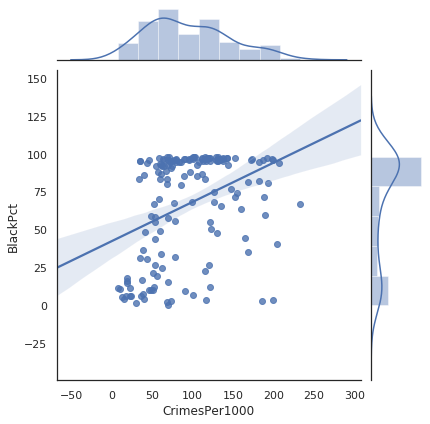

In [23]:
# We assume that the crime rate of a given neighborhood is positively associated with the percentage of black residents in the neighborhood, so I create a marginal plot of the two
# variables.
g1 = sns.jointplot(x="CrimesPer1000", y="BlackPct", data=geo_merged, kind='reg')
g1

In [24]:
# Keep Neighborhoods with 0 supermarkets/grocery stores and with a crime rate of 150 incidents per 1000 residents.

geo_merged = geo_merged[geo_merged['StoresPer1000'] == 0]
geo_merged = geo_merged[geo_merged['CrimesPer1000'] >= 150]
geo_merged.head()

,ID,Neighborhood,Latitude,Longitude,ViolentCrimes,CrimesPer1000,Number of Supermarkets,StoresPer1000,BlackPct
7,8,BARCLAY,39.315000,-76.611666,422,193,0.0,0.0,80.880330
15,16,BETTER WAVERLY,39.323246,-76.605889,524,182,0.0,0.0,82.219903
31,32,CARROLLTON RIDGE,39.282956,-76.648491,694,190,0.0,0.0,59.314129
55,56,DRUID HEIGHTS,39.309108,-76.637661,287,192,0.0,0.0,97.127589
58,59,EAST BALTIMORE MIDWA,39.314710,-76.603722,600,198,0.0,0.0,96.374423


In [25]:
# Sort in descending order by CrimesPer1000.

geo_merged.sort_values(by=['CrimesPer1000'], ascending=False)

,ID,Neighborhood,Latitude,Longitude,ViolentCrimes,CrimesPer1000,Number of Supermarkets,StoresPer1000,BlackPct
98,99,JONESTOWN,39.290322,-76.602278,318,233,0.0,0.0,67.154353
124,125,MILTON-MONTFORD,39.300323,-76.584221,288,207,0.0,0.0,93.817398
85,86,GWYNNS FALLS,39.277653,-76.668704,242,204,0.0,0.0,40.456081
109,110,LITTLE ITALY,39.284500,-76.601556,115,200,0.0,0.0,3.645833
108,109,LIBERTY SQUARE,39.321656,-76.657876,153,199,0.0,0.0,96.103896
58,59,EAST BALTIMORE MIDWA,39.314710,-76.603722,600,198,0.0,0.0,96.374423
7,8,BARCLAY,39.315000,-76.611666,422,193,0.0,0.0,80.880330
55,56,DRUID HEIGHTS,39.309108,-76.637661,287,192,0.0,0.0,97.127589
31,32,CARROLLTON RIDGE,39.282956,-76.648491,694,190,0.0,0.0,59.314129
126,127,MONTEBELLO,39.322787,-76.596500,22,188,0.0,0.0,71.794872


In [26]:
# Prepare high crime locations, or potential grocery store and supermarket locations, for mapping.
locations2 = geo_merged[['Latitude', 'Longitude']]
locationlist2 = locations2.values.tolist()
len(locationlist2)
locationlist2[22]

[39.343463, -76.604444]

In [27]:
# Map the potential grocery store and supermarket locations and overlay on heat map of crime.
map2 = folium.Map(location=[39.3, -76.6], zoom_start=12)
for point in range(0, len(locationlist2)):
    folium.CircleMarker(locationlist2[point],color='black',radius=7).add_to(map2)
HeatMap(heat_data, radius=15, max_zoom=10).add_to(map2)
map2

In [28]:
# Map locations of existing and potential grocery stores and supermarkets and overlay on heat map of Baltimore neighborhood crime.
map3 = folium.Map(location=[39.3, -76.6], zoom_start=12)
locations = balt_markets[['Venue Latitude', 'Venue Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
heat_df = geo_merged2[['Latitude', 'Longitude', 'CrimesPer1000']]
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=15, max_zoom=10).add_to(map3)
for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point],
                       fill='true',
                       radius=5,
                       fill_color='black',
                        color='clear',
                       fill_opacity=1).add_to(map3)
for point in range(0, len(locationlist2)):
    folium.CircleMarker(locationlist2[point],color='black',radius=7).add_to(map3)
HeatMap(heat_data, radius=15, max_zoom=10).add_to(map3)
map3

[Text(0.5, 0, 'Percentage Black')]

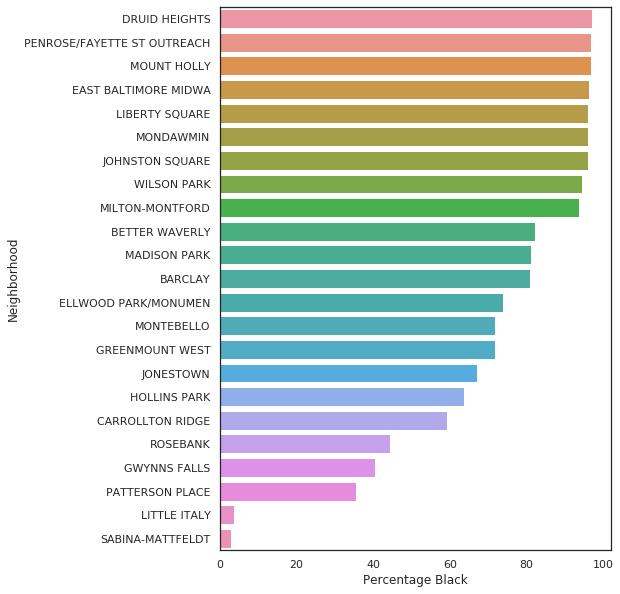

In [29]:
# Is it true that most of the high crime neighborhoods are high in percentage of residents who are black?
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7,10))
geo_merged = geo_merged.sort_values('BlackPct', ascending=False)
ax = sns.barplot(y='Neighborhood', x='BlackPct', data=geo_merged)
ax.set(xlabel = 'Percentage Black')

### Results

#### Figure 1 shows a map of the Baltimore, Maryland area with the locations of grocery stores and supermarkets.  Foursquare returned a total of 59 grocery stores and supermarkets.  As can easily be seen, there are huge swaths of the city that lack adequate grocery stores.  This is especially so in the west and north.  There does appear to be a concentration of stores closer to the center of the city, but this is to be expected given the higher concentration of people toward an urban area's downtown; lower concentrations of people exist at the edges of urban areas, particularly in the suburbs and exurbs.

#### Figure 2 allows one to visualize the locations of stores in relation to the crime.  The underlying heat map will be redder the higher the crime rate and greener the lower the crime rate.  It appears that, while grocery store locations exist closer to the city center in high crime areas, few grocery stores are in high crime areas the farther one moves away from the city center.  Indeed, the farther away from the city center one gets, its more likely that grocery stores will be located in safer neighborhoods.

#### Impacted by the lack of grocery stores and supermarkets in their neighborhoods are Black residents.  Figure 3 presents a marginal plot of crime rates against percentage of Black residents.  The higher the neighborhood crime rate goes, the higher is the percentage of Blacks in those neighborhoods.  To the degree that crime hinders or precludes economic development, Black residents are likely to be more negatively affected than their peers of other races.  More crime leads to less grocery stores and supermarkets in predominantly Black neighborhoods, thus affecting the health and well-being of Black residents and perhaps feeding back into the crime problem.

#### So where can the city of Baltimore advocate that potential grocery stores and supermarkets be located?  Restricting new locations to neighborhoods lacking a grocery store or supermarket and that has a higher than average crime rate, Figure 4 provides an answer.  Twenty-three neighborhoods that currently do not have a grocery store or supermarket are identified as locations for potential new stores.  They are shown as hollow black circles and are overlaid on top of a heat map of Baltimore crime.  We already know these are high crime neighborhoods, but visualizing where stores could be located makes the exercise of identification a much more concrete process.

#### The question of whether the highest crime neighborhoods where stores could potentially be located were more likely to be majority Black is supported by Figure 6. Of the 23 neighborhoods to potentially locate new grocery stores or supermarkets, 18 of them had a population of Black residents that constituted at least 60 percent of the neighborhood population total.  And half of those were above 90 percent Black.  If these people are now forced to travel farther for fresh and healthy food, the potential building or opening of new grocery stores or supermarkets would be a boon to them.  Other issues must of course be resolved, but this is a good start to address parts of Baltimore as Healthy Food Priority Areas.

### Conclusion and Limitations

#### The aim of this study was to identify neighborhoods in Baltimore, MD that might be Healthy Food Priority Areas (i.e., food deserts). Because HFPAs are predominantly occupied by and affect the health and well-being of minority populations, such identification will help the city and potential investors work together to bring healthy food to the people who need it most. The study found (1) there was a total of 59 grocery stores and supermarkets in the Baltimore, MD area, (2) areas lacking a sufficient number of stores were the west, southwest, and northeast parts of the city, and (3) High crime areas in neighborhoods with zero stores are candidates for potential stores locations in the future and their presence would provide greater grocery store and supermarket coverage for the city of Baltimore.


#### Any study is only as good as the data used to carry it out, of course, and I would have liked the best data for this study.  For instance, it would have been preferable to me to have official FBI crime statistics by neighborhood along with more current data on the characteristics of residents in those neighborhoods.  Also, because the study involves policy and involves cooperation between public and private spheres, there are issues that are likely unknown.  Some unknowns are known, but the unknown unknowns are the ones that can cause the greatest problems in the real world.  Of the known unknowns that I'm thinking about, I would like to know whether the city of Baltimore plans to allay business’ concern about crime in new locations by allocating sufficient resources to police and protect private companies’ investment.  That is, what safeguards are in place to protect businesses once they locate in crime-ridden areas?  Will the city help ensure that armed security are on premises at all times to protect the investments of their private partners.  Crime has a cost and it must be borne by someone.  There are doubtless a host of other issues that could be addressed, but I will conclude my thoughts here.
